# Real-world Data Wrangling

>Install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --target=/workspace ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Using cached certifi-2024.6.2-py3-none-any.whl (164 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl (16.5 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Using cached six-1.16.0-py2.p

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flwr 1.8.0 requires numpy<2.0.0,>=1.21.0, but you have numpy 2.0.0 which is incompatible.
flwr-datasets 0.1.0 requires numpy<2.0.0,>=1.21.0, but you have numpy 2.0.0 which is incompatible.
scipy 1.10.0 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install Pillow


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import pandas as pd
os.environ["KAGGLE_CONFIG_DIR"] = "./kaggle"

from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re
import ast
import requests




**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

`In this section, The data will be extracted using two different data gathering methods.`

### **1.1.** Problem Statement
The problem Statement is :  Are there any correlations between published date and review score?


With this study, I want to look into any possible relationship between a book's review score and the date of publishing. I will be organizing two datasets: one will contain book-related data, the other will contain user-generated data and rating book data. My goal in examining these datasets is to find patterns that show how a book's release date may affect reviews and readership.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually : The link of the dataset => https://drive.google.com/file/d/1ZSPtfe0z09JU021tyL-qhB5h4v68P6es/view?usp=sharing
  (Also the source of the data can be accessed from this link : https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv
)
- Programmatically downloading files

The reason for picking these datasets: 

`The chosen datasets will focus on books and their reviews. The data has been selected to analyze the relationship between books and reviews, exploring what factors contribute to a book receiving a high rating`

#### ***Dataset 1 (Books DataSet)***

Type:  CSV File.

Method: Programmatically downloading files

This dataset about books has been selected among other datasets because its have more features that can be used to analyse the data compared to other datasets

Dataset variables:

| Features       | Description                                       |
|----------------|---------------------------------------------------|
| Title          | Book Title                                        |
| Descripe       | Description of the book                           |
| authors        | Name of book authors                              |
| image          | URL for book cover                                |
| previewLink    | Link to access this book on Google Books          |
| publisher      | Name of the publisher                             |
| publishedDate  | The date of publish                               |
| infoLink       | Link to get more information about the book on Google Books |
| categories     | Genres of books                                   |
| ratingsCount   | Averaging rating for book                         |



In [5]:


#Make directory to save datasets
os.makedirs('datasets/raw_data', exist_ok=True)

In [6]:


# Set up Kaggle API
api = KaggleApi()
# Define the dataset and file to download
dataset = 'mohamedbakhet/amazon-books-reviews'  # Replace with the appropriate dataset path
file_name = 'books_data.csv'  # Replace with the specific file you want to download
path='./datasets/raw_data'
# Download the specific file
api.dataset_download_file(dataset, file_name, path=path)



Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews


True

In [7]:
#Extract the file if it is downloaded as a zip file
with zipfile.ZipFile(path+"/"+file_name + '.zip', 'r') as zip_ref:
    zip_ref.extractall(path+"/")
os.remove(path+"/"+file_name + '.zip')

print(f"{file_name} has been downloaded and extracted.")

books_data.csv has been downloaded and extracted.


In [8]:

#Load the data
books_data_df = pd.read_csv('datasets/raw_data/books_data.csv') 

#### ***Dataset 2 (Books Rating Dataset)***


Type:  CSV File

Method: Download data manually
Link to download the dataset:  https://drive.google.com/file/d/1ZSPtfe0z09JU021tyL-qhB5h4v68P6es/view?usp=sharing
Also the source of the data can be accessed from this link : https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv

This dataset about books reviews and rating has been selected among other datasets because its have relation between the first dataset, to make it possible to combine them together

Dataset variables:

| Features             | Description                                   |
|----------------------|-----------------------------------------------|
| id                   | The Id of Book                                |
| Title                | Book Title                                    |
| Price                | The price of Book                             |
| User_id              | Id of the user who rates the book             |
| profileName          | Name of the user who rates the book           |
| review/helpfulness   | Helpfulness rating of the review   |
| review/score         | Rating from 0 to 5 for the book               |
| review/time          | Time of given the review                      |
| review/summary       | The summary of a text review                  |
| review/text          | The full text of a review                     |

In [9]:

#Load the data
books_rating_df = pd.read_csv('datasets/raw_data/books_rating.csv') 

#### ***Conclusion***

- `In the Gathering Data step, two datasets were downloaded using two methods:`
    - `Programmatically downloading file.`
    - `Downloading data manually`
- `The datasets have been downloaded from Kaggle.`


- `The dataset that has been downloaded programmatically was done using the Kaggle API to download the dataset file. It was then unzipped to extract the CSV file from it, and finally, the file was saved in a folder in the workspace.`

## 2. Assess data

`This section will assess the data both programmatically and visually to identify problems with quality and tidiness.`


`I will go over the issues that have been discovered for every dataset in the end of each section.`

### ***A. Assess Data Quality Visually:***

#### ***Books Dataset***

`In this section will analyze the books data visually`

In [10]:
#Print the name of the columns for the books data
print("The columns for the books dataset are:")
print(books_data_df.columns.to_list())

The columns for the books dataset are:
['Title', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
37004,Murder Runs in the Family: A Southern Sisters ...,Mary Alice has spared nothing for her only dau...,['Anne George'],http://books.google.com/books/content?id=g1VfY...,http://books.google.com/books?id=g1VfYL0scI0C&...,Harper Collins,2009-02-24,https://play.google.com/store/books/details?id...,['Fiction'],6.0
172510,The Greek & Latin Roots of English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196131,King's Quest 1: The Floating Castle,The peaceful world of Danventry is shattered b...,['Craig Mills'],NaN,http://books.google.com/books?id=KbjvAAAACAAJ&...,Boulevard,1995,http://books.google.com/books?id=KbjvAAAACAAJ&...,['Fiction'],NaN
155633,Women and Men,NaN,['Joseph McElroy'],http://books.google.com/books/content?id=nvVQD...,http://books.google.com/books?id=nvVQDQEACAAJ&...,NaN,2017,http://books.google.com/books?id=nvVQDQEACAAJ&...,NaN,NaN
156944,Gems and Jewels Uncut Stones and Objets D'Art,NaN,NaN,NaN,http://books.google.com/books?id=HP98jgEACAAJ&...,NaN,1971,http://books.google.com/books?id=HP98jgEACAAJ&...,['Gems'],NaN
156532,"Dearly, Nearly, Insincerely: What Is an Adverb...",Audisee® eBooks with Audio combine professiona...,['Brian P. Cleary'],http://books.google.com/books/content?id=r98iE...,http://books.google.com/books?id=r98iEAAAQBAJ&...,Lerner Digital ™,2017-08-01,https://play.google.com/store/books/details?id...,['Juvenile Nonfiction'],1.0
208154,N C Wyeths Pilgrims,Recounts the coming of the Pilgrims to America...,['Robert D. San Souci'],http://books.google.com/books/content?id=QGspI...,http://books.google.com/books?id=QGspIYJGtC0C&...,Chronicle Books,1996-09,http://books.google.com/books?id=QGspIYJGtC0C&...,['Juvenile Fiction'],3.0
116763,Surmounting the Barricades: Women in the Paris...,This book vividly evokes radical women's integ...,['Carolyn Jeanne Eichner'],http://books.google.com/books/content?id=cHMRn...,http://books.google.nl/books?id=cHMRngEACAAJ&d...,NaN,2004,http://books.google.nl/books?id=cHMRngEACAAJ&d...,['History'],NaN
81657,Rebound to Better Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96084,General Chemistry With Student Technical Packa...,NaN,['Ebbing'],NaN,http://books.google.com/books?id=4MKNAAAACAAJ&...,NaN,2002-01-01,http://books.google.com/books?id=4MKNAAAACAAJ&...,NaN,NaN


#### ***Books Rating Dataset***

`In this section will analyze the books rating data visually `

In [12]:
#Print the name of the columns for the books rating data
print("The columns for the books rating dataset are:")
print(books_rating_df.columns.to_list())

The columns for the books rating dataset are:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']


In [13]:
#Display some sample from the books rating data
books_rating_df.sample(20,random_state=6)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
35940,B000G3LQ9K,PAVILION OF WOMEN,NaN,A1EDK3B5HVJRJK,D. Johnson,0/0,5.0,1356998400,Diane of Ann Arbor,I am so glad to finally see Pearl Buck's timel...
95028,0754053822,Disgrace: Complete & Unabridged,NaN,A15CFQRQSSK946,"C. Macauley ""cmacauley""",1/1,3.0,1253664000,"Not Good, Not Bad","I was disappointed, after having readLife and ..."
26270,9994790161,Raptor,NaN,A1D8L19RXU14Q3,S. Padalino,2/4,5.0,1152662400,Easily my favorite by Jennings,I loved this book. Anyone with a Europen herit...
30996,0399142347,Stone Angel (Kathleen Mallory Novels),NaN,A3CDA604S8GWBZ,"MLW ""mlw22""",1/1,5.0,897523200,Absolutely stunning.,I loved the first book in this series but was ...
19905,1560232153,Treat,NaN,A2XL13A9ERA0XY,"M. J. Lowe ""www.mjlowe.info""",7/8,4.0,1017014400,"True to its title,","A blonde, blue eyed, wealthy sorority girl, en..."
75247,0613674650,Me Talk Pretty One Day (Turtleback School & Li...,NaN,A2TZS45LNNAIEP,Dann Fox,0/0,3.0,1104883200,It's ok.,The parts about his troubles growing up with i...
80596,B000GRH51Y,Eden Close,NaN,A2LJ67PC9I0QUV,"""shavanda""",4/4,5.0,992476800,Suspense,When I read the Pilot's Wife I was very impres...
42905,1582790485,Signature Classics - Great Expectations (Signa...,NaN,NaN,NaN,0/0,4.0,987984000,Just Great!,Great Expectaitons by Charles Dickens is a goo...
53277,0075543893,Little Women,NaN,A29GDDD7S3HB6M,Claudia Harlow,0/0,5.0,1357689600,A most enjoyable read,"This truly is a beautiful classic, with storie..."
99445,B000HFCF2E,THE CHANEYSVILLE INCIDENT.,NaN,A461ZX1TLUR0,"Vanessa D. Tower ""homesick hippie""",2/2,5.0,1233878400,Racist? NOT!,"I went to high school with David in Bedford, P..."


#### ***Tidiness Issues That has been found***

- `After the first look on the two datasets and assess the data visually, the tidiness issues That has been found:`

  - `For the __Books__ dataset:`
    - Inconsistent Data Formats:
      - The __authors__ and __categories__ columns contain string in list so these columns must be converted into a more structured format such as string remove the list
    - Inconsistent Date Formats:
      - The __publishedDate__ column has dates in different formats, some row in yyyy-mm-dd format and other in yyyy format
    -  Inconsistent Column Headers Names:
      - The __Title__ column is capitalized while other column headers are in lowercase. 
    - Unrelated columns:
      - __image__, __previewLink__, and __infoLink__ columns are unrelated for the analyze process



  - `For the __Books Rating__ Dataset:`
    - Inconsistent Data Formats:
      - The __review/helpfulness__ column contains values with the format "X/Y", so the column should be separate into Two columns.
    - Inconsistent Column Headers Names:
      - Not all the columns has been named in the same formate, some columns has "/", other using camel case, and other are using "_" in the column name.
    - Redundant Information:
      - The __review/summary__ and __review/text__ columns might contain overlapping information, so one column could be deleted or the two columns could be merged.
    - Review Time Format:
      - The __review/time__ column is in Unix timestamp format which is not human-readable.
    -  Unrelated columns:
       - __Id__, __User_id__, __profileName__, and __Price__ columns are unrelated for the analyze process, we do not want the __Id__ column because the __title__ column will be used in the merging step not the __Id__
   

### ***B. Assess Data Quality Programmatically:***

#### ***Books Dataset***

`In this section will analyze the books data programmatically` 

In [14]:
#Print the shape of the books data (number of samples and number of features)

print(f'# of rows {books_data_df.shape[0]:,} , # of columns {books_data_df.shape[1]:,}')

# of rows 212,404 , # of columns 10


In [15]:
#Display some information about the books dataset using info function
print(books_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
None


In [16]:
#Print some information about the books dataset using the describe function
print(books_data_df.describe())

       ratingsCount
count  49752.000000
mean      21.252975
std      201.340431
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max     4895.000000


In [17]:
#print the count of values in each feature
print(books_data_df.value_counts())

Title                                                                                   description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [18]:
#Print the count of the null value in each feature
print("The count of null values for each feature:")
print(books_data_df.isnull().sum())

The count of null values for each feature:
Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


In [19]:
#Print the count of the duplicates row in the data set
print(f'The number of duplicates rows are: {books_data_df.duplicated().sum()}',)


The number of duplicates rows are: 0


#### ***Books Rating Dataset***

`In this section will analyze the books rating data programmatically` 

In [20]:
#Print the shape of the books data (number of samples and number of features)

print(f'# of rows {books_rating_df.shape[0]:,} , # of columns {books_rating_df.shape[1]:,}')

# of rows 100,000 , # of columns 10


In [21]:
#Print some information about the books dataset using the info function

print(books_rating_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  object 
 1   Title               99994 non-null   object 
 2   Price               15972 non-null   float64
 3   User_id             81276 non-null   object 
 4   profileName         81274 non-null   object 
 5   review/helpfulness  100000 non-null  object 
 6   review/score        100000 non-null  float64
 7   review/time         100000 non-null  int64  
 8   review/summary      99998 non-null   object 
 9   review/text         99999 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB
None


In [22]:
#Print some information about the books dataset using the describe function
print(books_rating_df.describe())

              Price  review/score   review/time
count  15972.000000  100000.00000  1.000000e+05
mean      21.938816       4.21349  1.132138e+09
std       26.902862       1.20388  1.492567e+08
min        1.000000       1.00000  8.107776e+08
25%       10.610000       4.00000  9.996480e+08
50%       14.930000       5.00000  1.128038e+09
75%       24.200000       5.00000  1.269302e+09
max      875.000000       5.00000  1.362355e+09


In [23]:
#print the count of values in each feature
print(books_rating_df.value_counts())

Id          Title                                                                                         Price   User_id         profileName                                       review/helpfulness  review/score  review/time  review/summary                            review/text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [24]:
#Print the count of the null value in each feature
print("The count of null values for each feature:")
print(books_rating_df.isnull().sum())

The count of null values for each feature:
Id                        0
Title                     6
Price                 84028
User_id               18724
profileName           18726
review/helpfulness        0
review/score              0
review/time               0
review/summary            2
review/text               1
dtype: int64


In [25]:
#Print the count of the duplicates row in the data set
print("The number of duplicates rows are:")
print(books_rating_df.duplicated().sum())

The number of duplicates rows are:
1692


#### ***Quality Issues that has been found***    

- `After assess the two datasets and assess programmatically, the quality issues That has been found:`

  - `For the __Books__ dataset:`
    - Missing Values:
      - Several columns, such as __Title__,__description__, __authors__, __image__, __previewLink__, __publisher__, __publishedDate__, __categories__, and __ratingsCount__, contain missing values (NaN).
  

  - `For the __Books Rating__ Dataset:`
    - Missing values:
      -__Title__ ,__User_id__, __ProfileName__, __Price__, __review/helpfulness__, __review/summary__, __review/text__ columns have missing values.
  - Duplicate Values:
    - The dataset has __1692__ duplicate rows

## ***3. Clean data***

`In this section, I will clean each dataset, addressing all issues discussed previously in the previous section. Additionally, I will verify the success of the cleaning steps.`

In [26]:
#Copy the two datasets into new data frames to clean them
books_clean_df=books_data_df.copy()
books_rating_clean_df=books_rating_df.copy()

### **Tidiness Issue 1:Unrelated columns (Remove unnecessary variables)**

>As discussed previously, the columns __image__, __previewLink__, and __infoLink__ from the Books dataset, and __profileName__, __Price__, __User_id__ and __Id__ from the Books Rating dataset are unrelated to the problem statement. Therefore, they will be removed before analysis

In [27]:
#Function to drop the unwanted columns
def drop_column(df,columns):
    df.drop(columns,axis=1, inplace=True)

In [28]:
#Delete the columns from the data frames (books_clean_df)
drop_column(books_clean_df,['image','previewLink','infoLink'])

In [29]:
#Delete the columns from the data frames (books_rating_clean_df)
drop_column(books_rating_clean_df,['Id','User_id','profileName','Price'])

**Check if the cleaning step was successful:**

In [30]:
#Print the name of the columns for the books data
print("The columns for the books dataset are:")
print(books_clean_df.columns.to_list())

The columns for the books dataset are:
['Title', 'description', 'authors', 'publisher', 'publishedDate', 'categories', 'ratingsCount']


In [31]:
#Print the name of the columns for the books rating data
print("The columns for the books rating dataset are:")
print(books_rating_clean_df.columns.to_list())

The columns for the books rating dataset are:
['Title', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']


### **Tidiness Issue 2: Inconsistent Data Formats**

> To handle the __review/helpfulness__ column split it into two separate columns: one for the numerator (X) and another for the denominator (Y). This way, each column will represent a distinct value, allowing for more meaningful analysis.


> Should handle also the __authors__ and __categories__ columns consistently. Since they are currently in string list format “[]”, they should be converted into actual list type []. However, it is recommended to extract all the values in the list by using explode method, but that will add more complexity to the merging and analyze steps by adding more unwanted duplicate rows.

**Process the review/helpfulness column:**

In [32]:
# Assign the values from the old column to the new two columns
books_rating_clean_df[["total_review","helpful_review"]]=books_rating_clean_df["review/helpfulness"].str.split("/", expand=True)

In [33]:
#Convert the datatype of the two columns into int
books_rating_clean_df["total_review"]=books_rating_clean_df["total_review"].astype(int)
books_rating_clean_df["helpful_review"]=books_rating_clean_df["helpful_review"].astype(int)



In [34]:
#Drop the old column from the dataset
drop_column(books_rating_clean_df,["review/helpfulness"])


**Check if the cleaning step was successful:**

In [35]:
#Print the columns of the books rating data
print("The columns for the books rating dataset are:")
books_rating_clean_df.columns.to_list()

The columns for the books rating dataset are:


['Title',
 'review/score',
 'review/time',
 'review/summary',
 'review/text',
 'total_review',
 'helpful_review']

In [36]:
#Display the data of the two columns ( authors, categories)
books_clean_df[["authors","categories"]]

,authors,categories
0,['Julie Strain'],['Comics & Graphic Novels']
1,['Philip Nel'],['Biography & Autobiography']
2,['David R. Ray'],['Religion']
3,['Veronica Haddon'],['Fiction']
4,['Edward Long'],NaN
...,...,...
212399,['Elvira Woodruff'],['Juvenile Fiction']
212400,NaN,['Juvenile Fiction']
212401,['Wild Wild Cabbage'],NaN
212402,['Zadie Smith'],['Fiction']


**Process the __authors__ and __categories__ columns**

In [37]:
#Function to convert string representation of string list "[]" to actual list []
def convert_to_list(column_value):
    try:
        return ast.literal_eval(column_value)
    except (ValueError, SyntaxError):
        return [column_value]

In [38]:
#Apply the function to the books dataset to convert the authors column
books_clean_df['authors'] = books_clean_df['authors'].apply(lambda x: convert_to_list(x) if pd.notna(x) else [])


In [39]:
#Apply the function to the books dataset to convert the categories column
books_clean_df['categories'] = books_clean_df['categories'].apply(lambda x: convert_to_list(x) if pd.notna(x) else [])

**Check if the cleaning step was successful:**

In [40]:
#Display the data of the two columns ( authors, categories) to check if the converting process was successful
books_clean_df[["authors","categories"]]

,authors,categories
0,[Julie Strain],[Comics & Graphic Novels]
1,[Philip Nel],[Biography & Autobiography]
2,[David R. Ray],[Religion]
3,[Veronica Haddon],[Fiction]
4,[Edward Long],[]
...,...,...
212399,[Elvira Woodruff],[Juvenile Fiction]
212400,[],[Juvenile Fiction]
212401,[Wild Wild Cabbage],[]
212402,[Zadie Smith],[Fiction]


### **Tidiness Issue 2: Inconsistent Column Headers Names**

>To ensure consistency in column names across the two datasets, the names of the columns will be formatted. as: Convert the column names to snake case "a_b" with all the letter to lower case

**Display how the column before cleaning step:**

In [41]:


#Print the columns of the books data
print("The columns for the books dataset are:")
books_clean_df.columns.to_list()

The columns for the books dataset are:


['Title',
 'description',
 'authors',
 'publisher',
 'publishedDate',
 'categories',
 'ratingsCount']

In [42]:
#Print the columns of the books rating data
print("The columns for the books rating dataset are:")
books_rating_clean_df.columns.to_list()

The columns for the books rating dataset are:


['Title',
 'review/score',
 'review/time',
 'review/summary',
 'review/text',
 'total_review',
 'helpful_review']

**Convert the books dataset columns into snake case:**

In [43]:
#Define a function that convert the columns names from the camel case to the snake case, also converts the letters to lower case
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [44]:
#Apply the function to the books dataset
books_clean_df.rename(columns=lambda x: camel_to_snake(x).lower(), inplace=True)


**Convert the books rating dataset columns into snake case:**

In [45]:
#Apply lambda function to the books rating dataset to convert the columns name from A/B to snake case and lower case
books_rating_clean_df.rename(columns=lambda x: x.replace('/', '_').lower(), inplace=True)


**Check if the cleaning steps were successful:**

In [46]:
#Print the columns of the books data
print("The columns for the books dataset are:")
books_clean_df.columns.to_list()

The columns for the books dataset are:


['title',
 'description',
 'authors',
 'publisher',
 'published_date',
 'categories',
 'ratings_count']

In [47]:
#Print the columns of the books rating data
print("The columns for the books rating dataset are:")
books_rating_clean_df.columns.to_list()

The columns for the books rating dataset are:


['title',
 'review_score',
 'review_time',
 'review_summary',
 'review_text',
 'total_review',
 'helpful_review']

### **Tidiness Issue 2: Inconsistent Date Formats**

> The date formate of the published_date column is inconsistent some row has the formate yyyy-mm-dd and other has yyyy so this column should be converted 


> Also The review_time column is on type that is unreadable so it should be converted from unix timestamp to dateTime type

In [48]:
#Function to get the Year from the date 
def standardize_date(date_str):
    try:
        return pd.to_datetime(date_str).strftime('%Y')
    except:
        return date_str

In [49]:
# Apply the function to the date column
books_clean_df['published_date'] = books_clean_df['published_date'].apply(standardize_date)

In [50]:
# Convert Unix timestamp to readable date format (converts the Unix timestamp (which is in seconds) to a pandas datetime object)
books_rating_clean_df['review_time'] = pd.to_datetime(books_rating_clean_df['review_time'], unit='s').dt.strftime('%Y-%m-%d')

**Check if the cleaning steps was successful:**

In [51]:
#Display the column data after the converting process
books_clean_df['published_date']


0         1996
1         2005
2         2000
3         2005
4         2003
          ... 
212399    2000
212400    1995
212401    2018
212402    2003
212403    1998
Name: published_date, Length: 212404, dtype: object

In [52]:
#Display the column data after the converting process
books_rating_clean_df['review_time']

0        2012-10-23
1        2001-03-28
2        2005-01-11
3        2011-05-14
4        2012-12-05
            ...    
99995    2002-03-28
99996    1998-05-11
99997    2006-10-17
99998    2001-11-12
99999    2000-05-16
Name: review_time, Length: 100000, dtype: object

### **Quality Issues 1:Duplicate Values**

> To maintain data consistency, removing duplicate rows is a crucial step. As you mentioned during the dataset assessment, the book ratings dataset contains duplicate values, so it’s essential to eliminate them. This process ensures that your analysis is based on accurate and non-redundant data.


In [53]:
#Delete the duplicate rows from the books_rating_clean_df
books_rating_clean_df = books_rating_clean_df.drop_duplicates()

**Check if the cleaning step was successful:**

In [54]:
#Print the count of the duplicates row in the data set
print(f'The number of duplicates rows are: {books_rating_clean_df.duplicated().sum()}')

The number of duplicates rows are: 0


### **Quality Issues2:Missing Values**

> Removing rows with missing values is essential for ensuring the validity of your merged dataset. By eliminating these missing values, you’ll create a cleaner and more reliable dataset for your analysis.


In [55]:
#Remove the missing values from the books dataset
books_clean_df.dropna(inplace=True)

In [56]:
#Remove the missing values from the books rating dataset
books_rating_clean_df.dropna(inplace=True)

**Check if the cleaning step was successful:**

In [57]:
#Print the count of the null value in each feature
print("The count of null values for each feature for the books data:")
print(books_clean_df.isnull().sum())


The count of null values for each feature for the books data:
title             0
description       0
authors           0
publisher         0
published_date    0
categories        0
ratings_count     0
dtype: int64


In [58]:
#Print the count of the null value in each feature 
print("The count of null values for each feature for the books rating data:")
print(books_rating_clean_df.isnull().sum())

The count of null values for each feature for the books rating data:
title             0
review_score      0
review_time       0
review_summary    0
review_text       0
total_review      0
helpful_review    0
dtype: int64


### **Combine datasets**

In this section I will use __title__ column to merge the two datasets into one

In [67]:
#Merge the Two datasets
merged_book_data_df = pd.merge(books_clean_df, books_rating_clean_df, on='title', how='inner')


## 4. Update data store

`The clean Data will be stored in the /datasets/cleanData directory`

`The merged data will be saved in the /data directory, and the file name will be datasets/merged_data/merged_data.csv`

`NOTE: For Storage purposing I will save just the 1000 sample of the data into the local storage`

In [68]:

#Make directory to save datasets
os.makedirs('datasets/clean_data', exist_ok=True)

os.makedirs('datasets/merged_data', exist_ok=True)

In [69]:
# Save the cleaned Books DataFrame to a CSV file
books_to_save_df = books_clean_df.sample(n=1000, replace=True, random_state=1)

books_to_save_df.to_csv('datasets/clean_data/books_data.csv', index=False)

In [70]:
# Save the cleaned Books DataFrame to a CSV file
books_rating_to_save_df = books_rating_clean_df.sample(n=1000, replace=True, random_state=1)

books_rating_to_save_df.to_csv('datasets/clean_data/books_rating.csv', index=False)

In [71]:

# Save the cleaned Books DataFrame to a CSV file
merged_book_data_to_save_df = merged_book_data_df.sample(n=1000, replace=True, random_state=1)
merged_book_data_to_save_df.to_csv('datasets/merged_data/merged_data.csv', index=False)

## ***5. Answer the research question***



### ***5.1: Problem Statement : Are there any correlations between published date and review score?***

#### ***Visual 1***

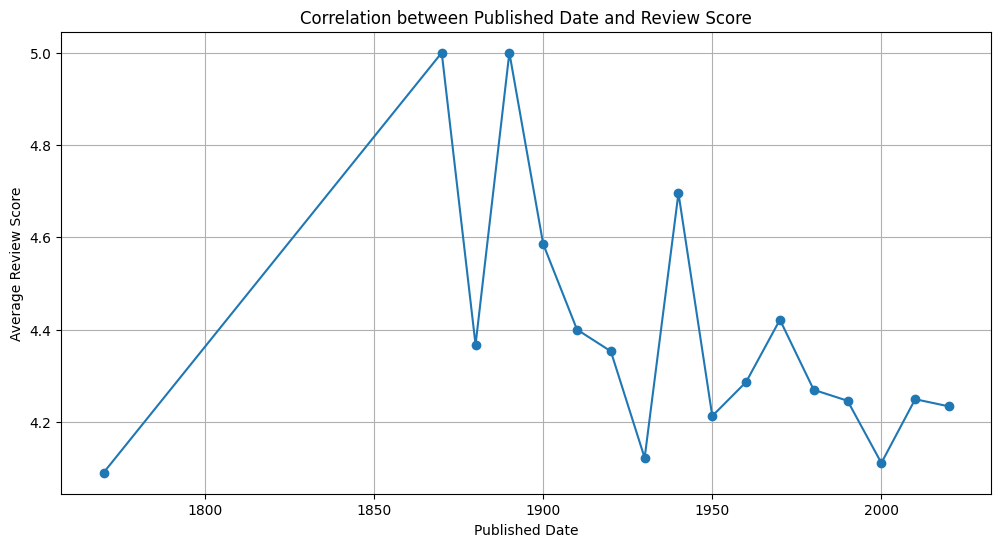

In [72]:
# Convert published_date to datetime
merged_book_data_df['published_date'] = pd.to_datetime(merged_book_data_df['published_date'], errors='coerce')

#Extract the decade from the published_date
merged_book_data_df['date'] = (merged_book_data_df['published_date'].dt.year // 10) * 10

#Calculate average review score per decade
avg_review_scores_decade = merged_book_data_df.groupby('date')['review_score'].mean().reset_index()

#Plotting the correlation between published decade and review score using a line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_review_scores_decade['date'], avg_review_scores_decade['review_score'], marker='o')
plt.title('Correlation between Published Date and Review Score')
plt.xlabel('Published Date')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()

#### ***Visual 2***

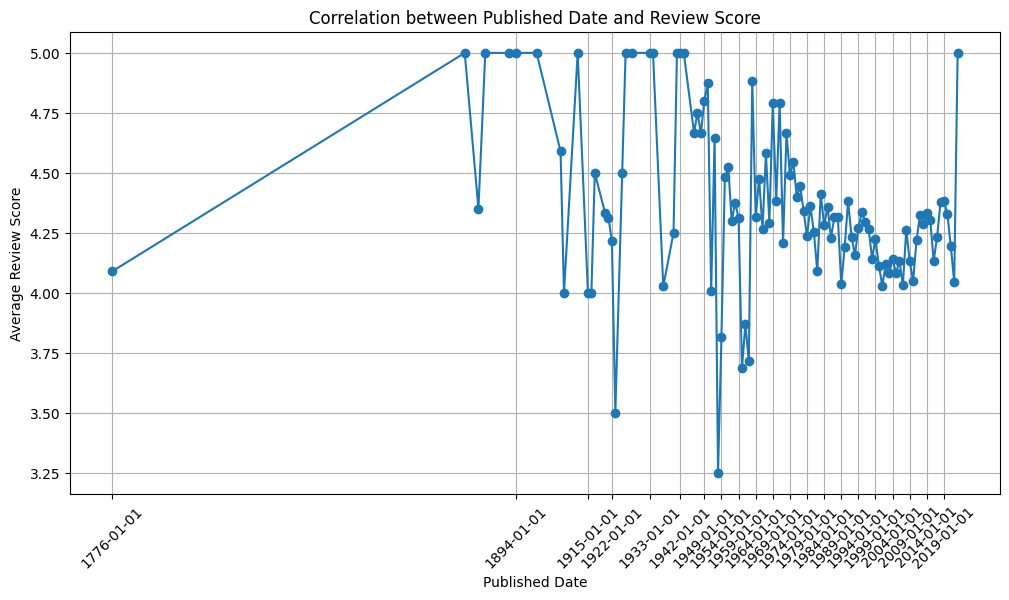

In [73]:
#Calculate average review score per published Date
avg_review_scores = merged_book_data_df.groupby('published_date')['review_score'].mean().reset_index()

#Plotting the correlation between published Date and review score using a line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_review_scores['published_date'], avg_review_scores['review_score'], marker='o')
plt.title('Correlation between Published Date and Review Score')
plt.xlabel('Published Date')
plt.ylabel('Average Review Score')
plt.grid(True)

# Selectively label every nth Date
n = 5  # Change this value to control the frequency of labels
plt.xticks(avg_review_scores['published_date'][::n], rotation=45)

plt.show()

#### ***Visual 1&2 Conclusion***

`The average review score varies a lot previous to the 1900s but becomes stable and becomes more constant after that time, as seen by the line plots in Visuals 1 and 2. There are distinct peaks and troughs in the early years, which could indicate fewer reviews or uneven review patterns. Following 1900, there is a more consistent pattern of review behavior as the scores level out around an average value. There is a tiny dip in recent years, which may indicate that average scores for newer publications are a little lower. Prior to 1900, the steep peaks and troughs might have been the result of outliers or a small number of data points.`

#### ***Visual 3***

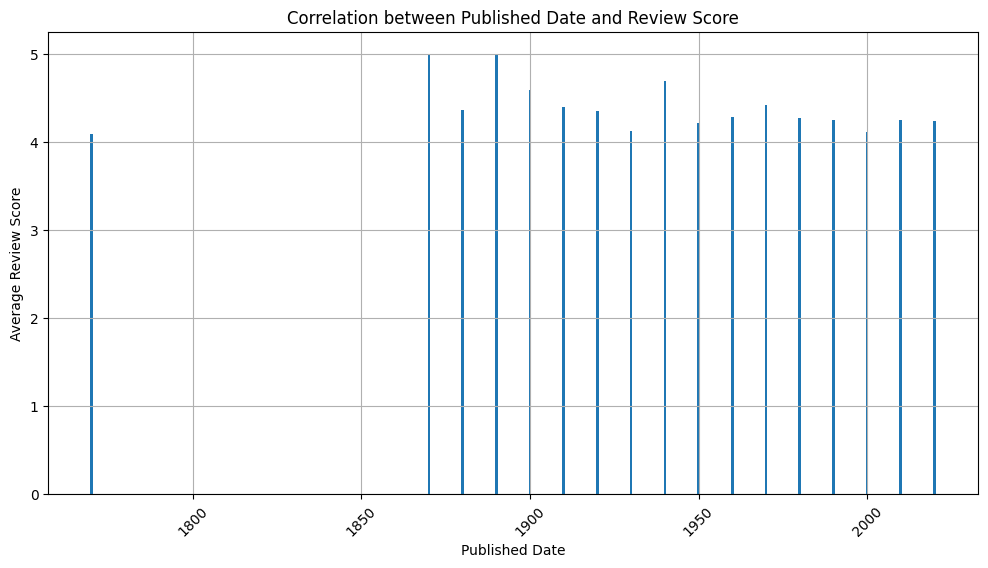

In [74]:


# Convert published_date to datetime
merged_book_data_df['published_date'] = pd.to_datetime(merged_book_data_df['published_date'], errors='coerce')

# Extract the decade from the published_date
merged_book_data_df['date'] = (merged_book_data_df['published_date'].dt.year // 10) * 10

# Calculate average review score per date
avg_review_scores_decade = merged_book_data_df.groupby('date')['review_score'].mean().reset_index()

# Plotting the correlation between published date and review score using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_review_scores_decade['date'], avg_review_scores_decade['review_score'])
plt.title('Correlation between Published Date and Review Score')
plt.xlabel('Published Date')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### ***Visual 3 Conclusion***

`The bar plot shows in visual #3 that average review scores have been more stable across decades from the 1900s onwards. In the 1800s, scores were high, possibly due to very positive reviews. In the mid-20th century the scores has decreased , could indicate negative reviews. Recent decades have stable scores around 4, indicating consistent review patterns. Overall, post-1900 scores show less variation, pointing to more consistent reviewing practices or publication standards.`

#### ***Conclusion***


`All three plots show that review scores have become more stable and consistent over time, especially from the 1900s onwards. Significant variations in the early years suggest inconsistent review patterns or limited data points in for those years. Recent decades have consistent scores, reflecting more uniform reviewing standards. High early scores might be due to fewer reviews or positive bias, while recent scores reflect a larger dataset and varied reviews. These reviews and patterns can help publishers recognize historical patterns in reviews and adjust strategies to maintain or improve average scores.`

### **5.2:** Reflection

If I hade more time I will look more into the "Redundant Information" issue and analyze more the "Inconsistent Data Formats" issue.

Also I would like to analyze the text of the reviews to detect any pattern that might help to know which text the user could be used for good and bad books, and analyze the relation between the text and the score, and put a question "What the most word used in the text reviews for a book that have high score?"